<a href="https://colab.research.google.com/github/matiasjara987/Libros-Colab/blob/main/Proyecto_An%C3%A1lisis_De_Datos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación del Dataset



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/DataScience_salaries_2024.csv')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge      # Para regresiones Lasso (L1) y Ridge (L2)
from sklearn.preprocessing import PolynomialFeatures  # Para generar características polinómicas
from sklearn.tree import DecisionTreeRegressor       # Para el modelo de Árbol de Decisión
from sklearn.ensemble import RandomForestRegressor   # Para el modelo de Random Forest
from sklearn.svm import SVR                          # Para el modelo de Support Vector Regression (SVR)


In [ ]:
df = pd.read_csv('/content/DataScience_salaries_2024.csv')

# A. Introducción al Dataset



Este dataset puede utilizarse para analizar las tendencias salariales en ciencia de datos, incluyendo variaciones según títulos de trabajo, ubicaciones y niveles de experiencia.
Puede ayudar a comprender el impacto de factores como el trabajo remoto, el tamaño de la empresa y la ubicación en la compensación para roles en ciencia de datos.
Este dataset es útil para analizar patrones y tendencias de compensación en roles de ciencia de datos a través de varias demografías.

También puede ayudar a establecer puntos de referencia salariales en función de la experiencia, el título del trabajo y el tamaño de la empresa, así como a evaluar los efectos del trabajo remoto y la ubicación geográfica en los niveles salariales.

**Descripción de columnas**

| Nombre de la Columna    | Descripción                                                                                     |
|-------------------------|-------------------------------------------------------------------------------------------------|
| work_year               | El año en que se recopiló el dato salarial.                                                     |
| experience_level        | El nivel de experiencia del empleado (por ejemplo, Junior, Intermedio, Senior, Experto).        |
| employment_type         | El tipo de empleo (por ejemplo, Tiempo completo, Medio tiempo, Contrato).                       |
| job_title               | El título o rol del empleado en el área de ciencia de datos.                                    |
| salary                  | El salario del empleado en la moneda especificada por salary_currency.                          |
| salary_currency         | La moneda en la que se expresa el salario.                                                      |
| salary_in_usd           | El salario del empleado convertido a USD para su estandarización.                               |
| employee_residence      | La ubicación de residencia del empleado.                                                        |
| remote_ratio            | El porcentaje de trabajo remoto permitido para el puesto (por ejemplo, 0, 50, 100).             |
| company_location        | La ubicación de la empresa donde trabaja el empleado.                                           |
| company_size            | El tamaño de la empresa según el número de empleados (por ejemplo, Pequeña, Mediana, Grande).   |



# B. Análisis Descriptivo y Limpieza de Datos




## Análisis Descriptivo

In [ ]:
analisis_descriptivo = df.drop(columns='salary').describe()
analisis_descriptivo = analisis_descriptivo.drop(['count', '25%', '50%', '75%'])
analisis_descriptivo = analisis_descriptivo.round(0)
analisis_descriptivo

,work_year,salary_in_usd,remote_ratio
mean,2023.0,149875.0,33.0
std,1.0,69009.0,46.0
min,2020.0,15000.0,0.0
max,2024.0,800000.0,100.0


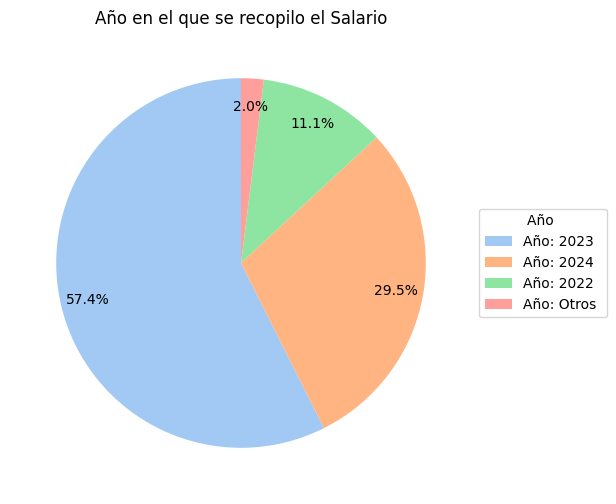

In [ ]:
df['work_year_grouped'] = df['work_year'].apply(lambda x: x if x in [2022, 2023, 2024] else "Otros")
year_counts = df['work_year_grouped'].value_counts()

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    year_counts, explode=None, labels=None, autopct='%1.1f%%', startangle=90,
    colors=sns.color_palette("pastel"), pctdistance=0.85
)
plt.legend(
    wedges, [f"Año: {year} " for year, count in zip(year_counts.index, year_counts)],
    title="Año ", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1)
)
for autotext in autotexts:
    autotext.set_size(10)
    autotext.set_color("black")
plt.title("Año en el que se recopilo el Salario")
plt.show()

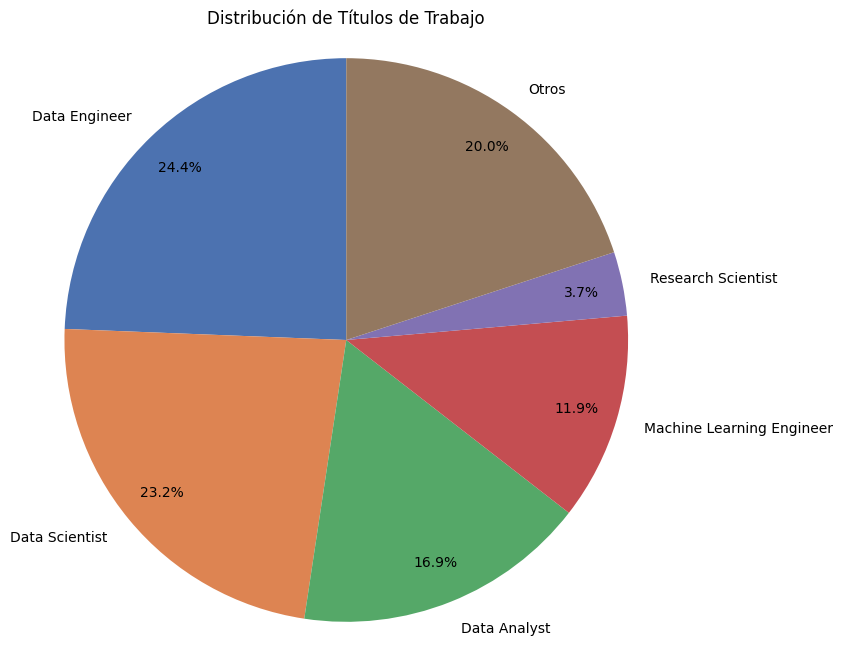

In [ ]:
job_title_counts = df['job_title'].value_counts()
job_title_percentage = job_title_counts / job_title_counts.sum() * 100

job_title_grouped = job_title_percentage[job_title_percentage >= 3].copy()
job_title_grouped['Otros'] = job_title_percentage[job_title_percentage < 1.3].sum()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    job_title_grouped,
    labels=job_title_grouped.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("deep"),
    pctdistance=0.85
)
plt.title("Distribución de Títulos de Trabajo")
plt.axis('equal')
plt.show()

Los puestos agrupados en otros son muestran que no representan mas que un 1% de los datos recopilados, teniendo como media 30 puestos por cargo.

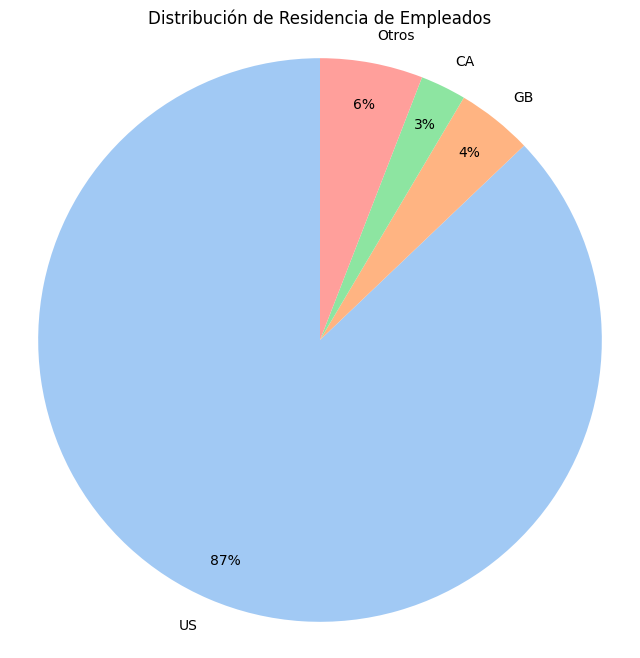

In [ ]:
residence_counts = df['employee_residence'].value_counts()
residence_percentage = residence_counts / residence_counts.sum() * 100

residence_grouped = residence_percentage[residence_percentage > 1].copy()
residence_grouped['Otros'] = residence_percentage[residence_percentage <= 1].sum()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    residence_grouped,
    labels=residence_grouped.index,
    autopct='%1.0f%%',
    startangle=90,
    colors=sns.color_palette("pastel"),
    pctdistance=0.85
)

plt.title("Distribución de Residencia de Empleados")
plt.axis('equal')
plt.show()

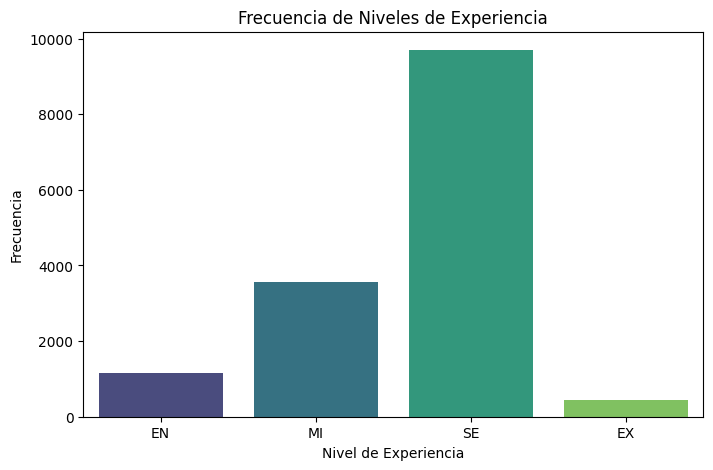

In [ ]:
experience_counts = df['experience_level'].value_counts()
experiencie_level_counts = experience_counts.reindex(["EN", "MI", "SE", "EX"], fill_value=0)

plt.figure(figsize=(8, 5))
sns.barplot(x=experiencie_level_counts.index, y=experiencie_level_counts.values, hue=experiencie_level_counts.index, palette="viridis", dodge=False)
plt.title("Frecuencia de Niveles de Experiencia")
plt.xlabel("Nivel de Experiencia")
plt.ylabel("Frecuencia")
plt.show()

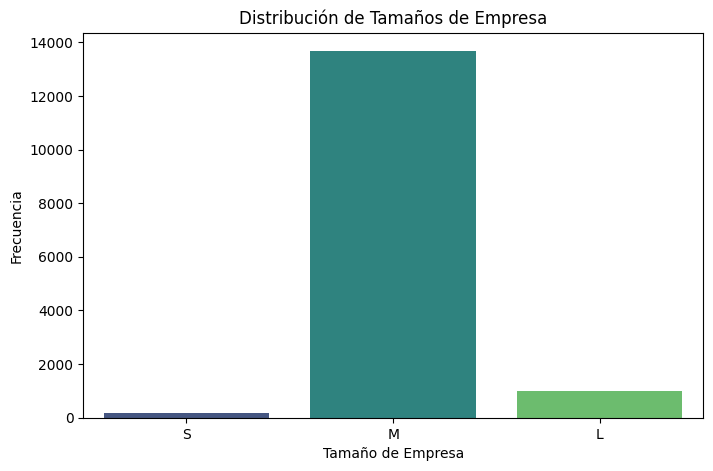

In [ ]:
company_size_counts = df['company_size'].value_counts()
company_size_counts = company_size_counts.reindex(["S", "M", "L"], fill_value=0)

plt.figure(figsize=(8, 5))
sns.barplot(x=company_size_counts.index, y=company_size_counts.values, hue=company_size_counts.index, palette="viridis", dodge=False)
plt.title("Distribución de Tamaños de Empresa")
plt.xlabel("Tamaño de Empresa")
plt.ylabel("Frecuencia")
plt.show()

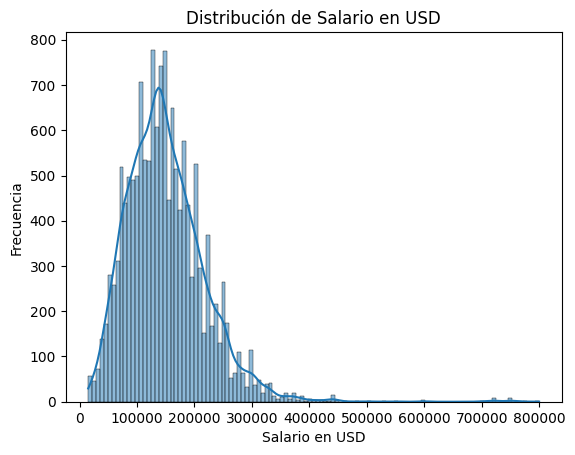

In [ ]:
sns.histplot(df['salary_in_usd'], kde=True)
plt.title("Distribución de Salario en USD")
plt.xlabel("Salario en USD")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
print("Frecuencia de tipo de empleo:\n", df['employment_type'].value_counts())

Frecuencia de tipo de empleo:
 employment_type
FT    14772
PT       27
CT       26
FL       13
Name: count, dtype: int64


## Identificación de Nulos y Outliers

In [ ]:
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


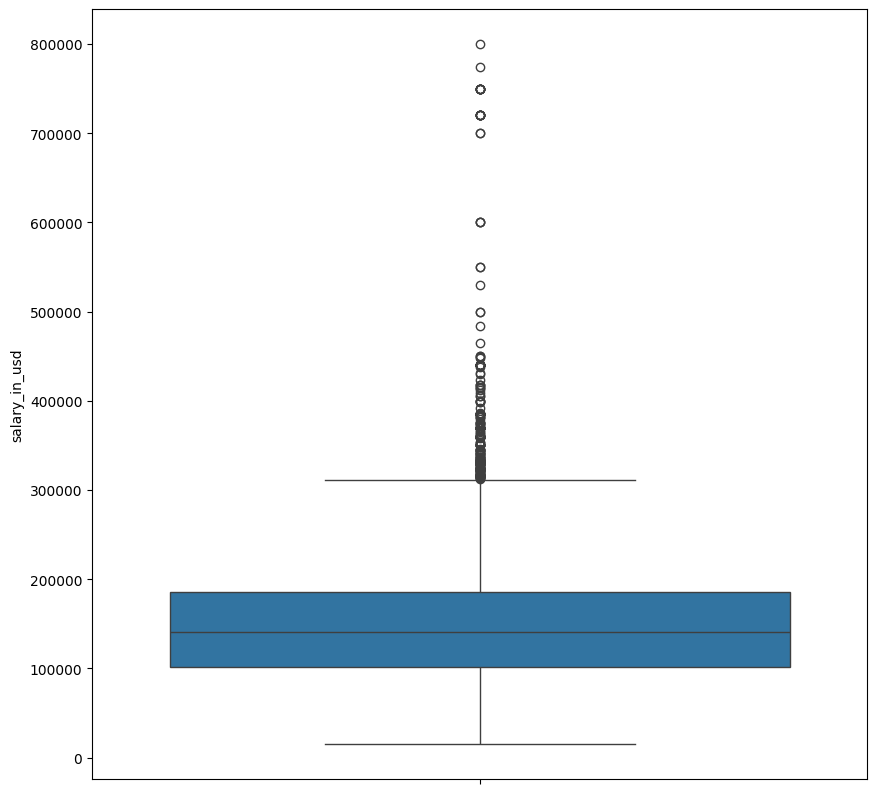

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df['salary_in_usd'])
plt.show()

In [ ]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['salary_in_usd'] < limite_inferior) | (df['salary_in_usd'] > limite_superior)]

cantidad_outliers_antes = outliers.shape[0]
pd.set_option('display.max_rows', None)
print("Cantidad de outliers:", cantidad_outliers_antes)

Cantidad de outliers: 270


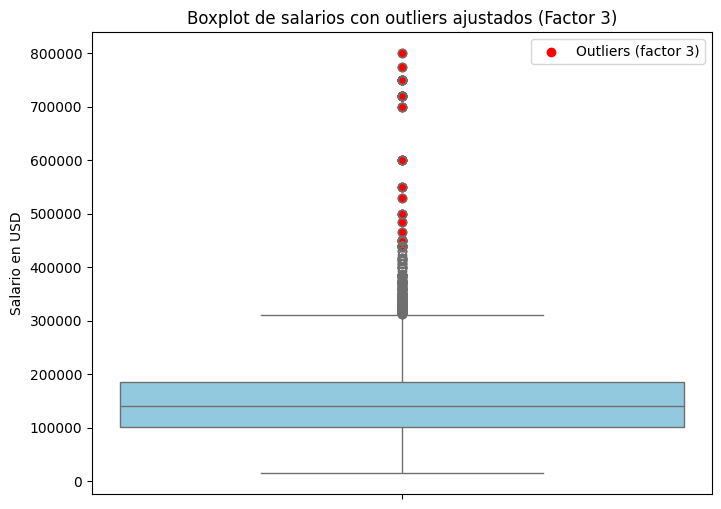

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

factor = 3
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - factor * IQR
limite_superior = Q3 + factor * IQR

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='salary_in_usd', color="skyblue")

outliers_reducidos = df[(df['salary_in_usd'] < limite_inferior) | (df['salary_in_usd'] > limite_superior)]
plt.scatter([0] * len(outliers_reducidos), outliers_reducidos['salary_in_usd'], color='red', label="Outliers (factor 3)")

plt.title("Boxplot de salarios con outliers ajustados (Factor 3)")
plt.ylabel("Salario en USD")
plt.legend()
plt.show()


In [ ]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
median_value = df['salary_in_usd'].median()
df['salary_usd_modified'] = df['salary_in_usd'].apply(lambda x: median_value if x < lower_limit or x > upper_limit else x)

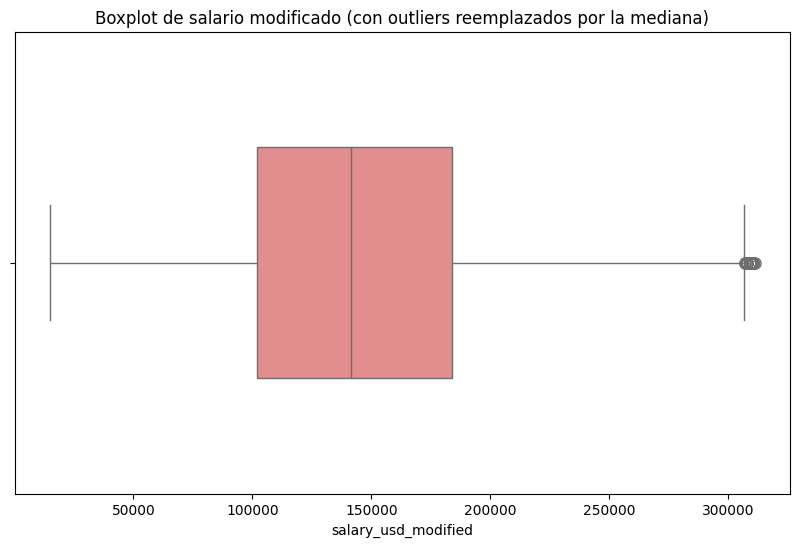

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salary_usd_modified'], color='lightcoral', width=0.5, fliersize=8)
plt.title('Boxplot de salario modificado (con outliers reemplazados por la mediana)')
plt.show()

In [ ]:
Q1 = df['salary_usd_modified'].quantile(0.25)
Q3 = df['salary_usd_modified'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['salary_usd_modified'] < limite_inferior) | (df['salary_usd_modified'] > limite_superior)]

cantidad_outliers = outliers.shape[0]
pd.set_option('display.max_rows', None)

In [ ]:

print("Cantidad de outliers ANTES:", cantidad_outliers_antes)
print("Cantidad de outliers DESPUËS:", cantidad_outliers)

Cantidad de outliers ANTES: 270
Cantidad de outliers DESPUËS: 45


## Criterio de Limpieza



El criterio de limpieza que utilizamos para ajustar los outliers incluyó varias técnicas, como el Z-score, la escala logarítmica y el escalado robusto. Sin embargo, ninguna de estas técnicas logró reducir de manera significativa los outliers. Por esta razón, optamos por una técnica de reemplazo, donde sustituimos los datos atípicos en una nueva columna llamada 'salary_usd_modified'.

La elección de esta técnica se debió a que nuestro objetivo era reducir el impacto de los outliers en los modelos futuros sin afectar negativamente los datos reales. De esta manera, logramos obtener los resultados solicitados sin comprometer la integridad de la información.

Outliers al inicio: 270
Outliers al final: 45
Conclusión: Con este método logramos disminuir en un 83% la cantidad de datos para crear mejores predicciones, sin afectar negativamente nuestra información inicial

## Visualizaciones

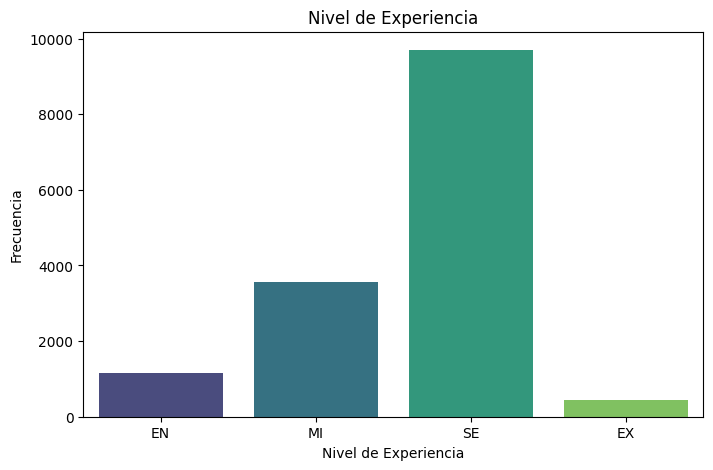

In [ ]:
experience_counts = df['experience_level'].value_counts()
experiencie_level_counts = experience_counts.reindex(["EN", "MI", "SE", "EX"], fill_value=0)

plt.figure(figsize=(8, 5))
sns.barplot(x=experiencie_level_counts.index, y=experiencie_level_counts.values, hue=experiencie_level_counts.index, palette="viridis", dodge=False)
plt.title("Nivel de Experiencia")
plt.xlabel("Nivel de Experiencia")
plt.ylabel("Frecuencia")
plt.show()

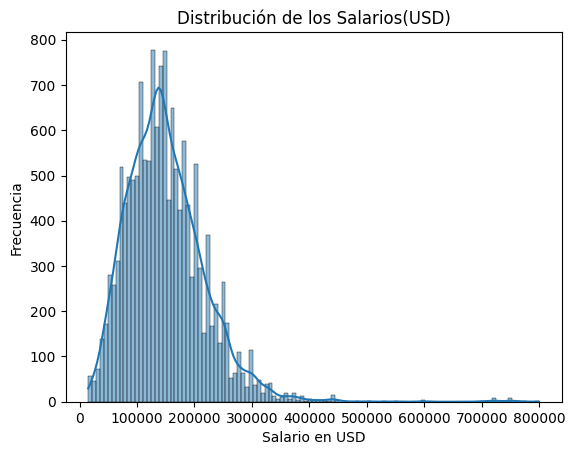

In [ ]:
sns.histplot(df['salary_in_usd'], kde=True)
plt.title("Distribución de los Salarios(USD)")
plt.xlabel("Salario en USD")
plt.ylabel("Frecuencia")
plt.show()

## Correlación
  Correlación entre Variables: Calculen y comenten las correlaciones relevantes encontradas en el dataset.
  

Para poder crear correlaciones debemos ocupar tecnicas que nos permiten llevar nuestros datos a valores númericos que sean posibles de correlacionar

In [ ]:
df_encoded = df.drop(columns=['job_title', 'salary', 'employee_residence' , 'work_year_grouped', 'salary_usd_modified', 'salary_currency'])

In [ ]:
df_encoded.head()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_location,company_size
0,2021,MI,FT,40038,100,CL,L
1,2021,MI,FT,36259,50,US,L
2,2020,MI,FT,35735,50,HU,L
3,2021,MI,FT,77364,50,JP,S
4,2022,SE,FT,95386,50,IN,L


In [ ]:
# Diccionario de asignación de país a continente
continent_dict = {
    "North America": ["US", "CA", "MX", "PR", "DO"],
    "South America": ["BR", "CO", "AR", "CL", "EC", "PE", "BO"],
    "Europe": ["GB", "ES", "DE", "FR", "PT", "NL", "IT", "GR", "LT", "PL", "LV", "IE",
               "UA", "EE", "AT", "CH", "SI", "BE", "HR", "RO", "HU", "FI", "MT", "DK",
               "NO", "BA", "SE", "RS", "LU", "CY", "BG", "AD", "JE"],
    "Asia": ["IN", "JP", "TR", "SG", "PH", "PK", "RU", "AE", "UZ", "KR", "AM", "LB",
             "HK", "IL", "OM", "KW", "IQ", "QA", "MY", "GE", "CN", "IR", "ID"],
    "Oceania": ["AU", "NZ", "AS"],
    "Africa": ["ZA", "EG", "NG", "GH", "CF", "KE", "TN", "UG", "DZ", "MU", "SA"]
}
# Función para asignar el continente
def assign_continent(country_code):
    for continent, countries in continent_dict.items():
        if country_code in countries:
            return continent
    return None  # Si no se encuentra el país en el diccionario

# Crear la columna de continentes en el DataFrame df_encoded
df_encoded['continent'] = df_encoded['company_location'].apply(assign_continent)

# Aplicar One-Hot Encoding en la columna de continentes
df_encoded = pd.get_dummies(df_encoded, columns=['continent'])


In [ ]:
año_mapping = {
    2020: 0,
    2021: 1,
    2022: 2,
    2023: 3,
    2024: 4
}
df_encoded['work_year_numeric'] = df_encoded['work_year'].map(año_mapping)

nivel_mapping = {
    'EN': 0,
    'MI': 1,
    'SE': 2,
    'EX': 3
}
df_encoded['experience_level_numeric'] = df_encoded['experience_level'].map(nivel_mapping)

company_mapping = {
    'S': 0,
    'M': 1,
    'L': 2
}
df_encoded['company_size_numeric'] = df_encoded['company_size'].map(company_mapping)

df_encoded = pd.get_dummies(df_encoded, columns=['employment_type'])

In [ ]:
df_encoded = df_encoded.drop(columns=['work_year', 'experience_level', 'company_size', 'company_location'])

In [ ]:
df_encoded.head()

,salary_in_usd,remote_ratio,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,work_year_numeric,experience_level_numeric,company_size_numeric,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,40038,100,False,False,False,False,False,True,1,1,2,False,False,True,False
1,36259,50,False,False,False,True,False,False,1,1,2,False,False,True,False
2,35735,50,False,False,True,False,False,False,0,1,2,False,False,True,False
3,77364,50,False,True,False,False,False,False,1,1,0,False,False,True,False
4,95386,50,False,True,False,False,False,False,2,2,2,False,False,True,False


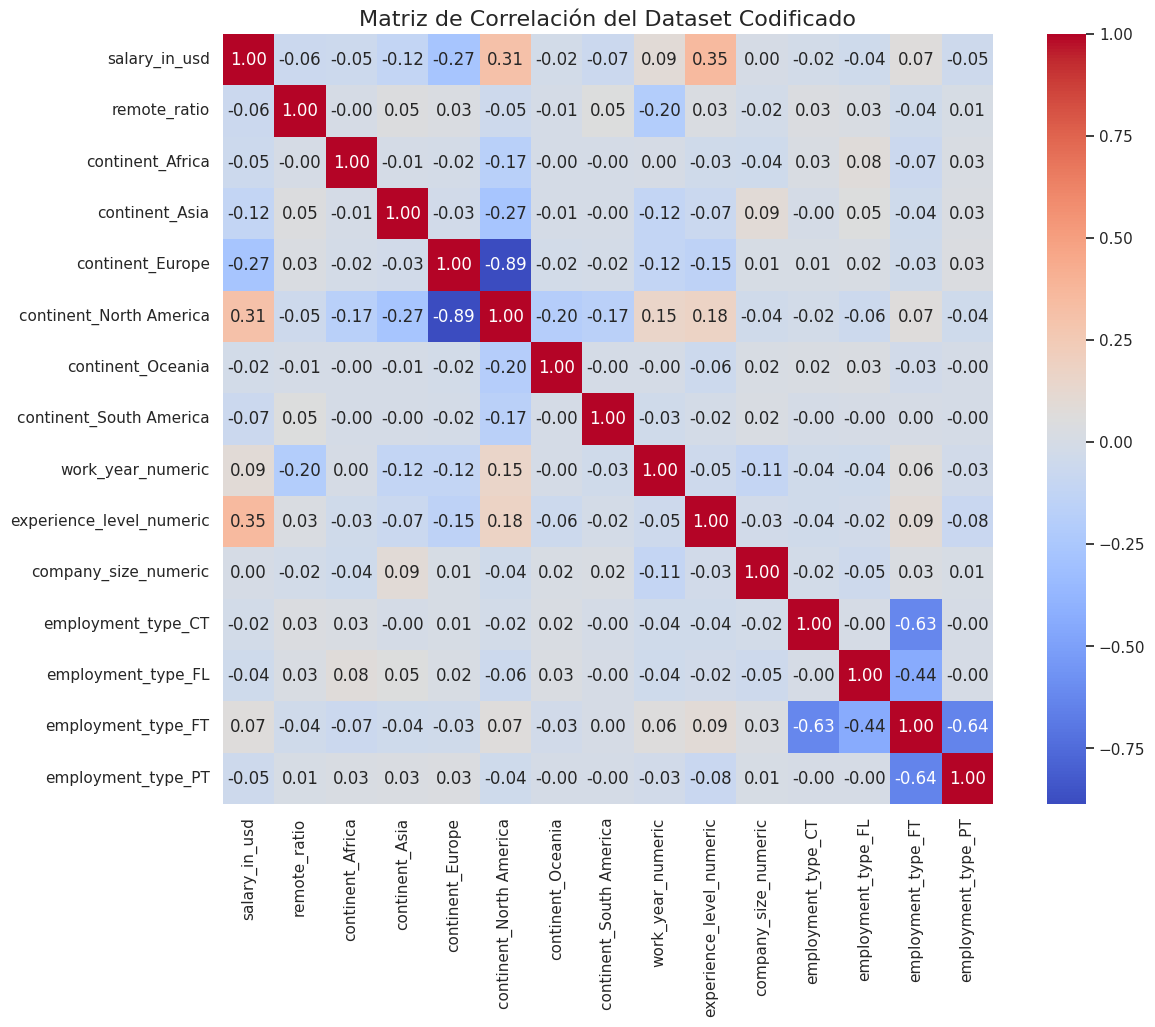

In [ ]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(14, 10))
sns.set(style="white")

# Crear un heatmap de la matriz de correlación
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, square=True, fmt=".2f")

# Título y ajustes de visualización
plt.title("Matriz de Correlación del Dataset Codificado", fontsize=16)
plt.show()

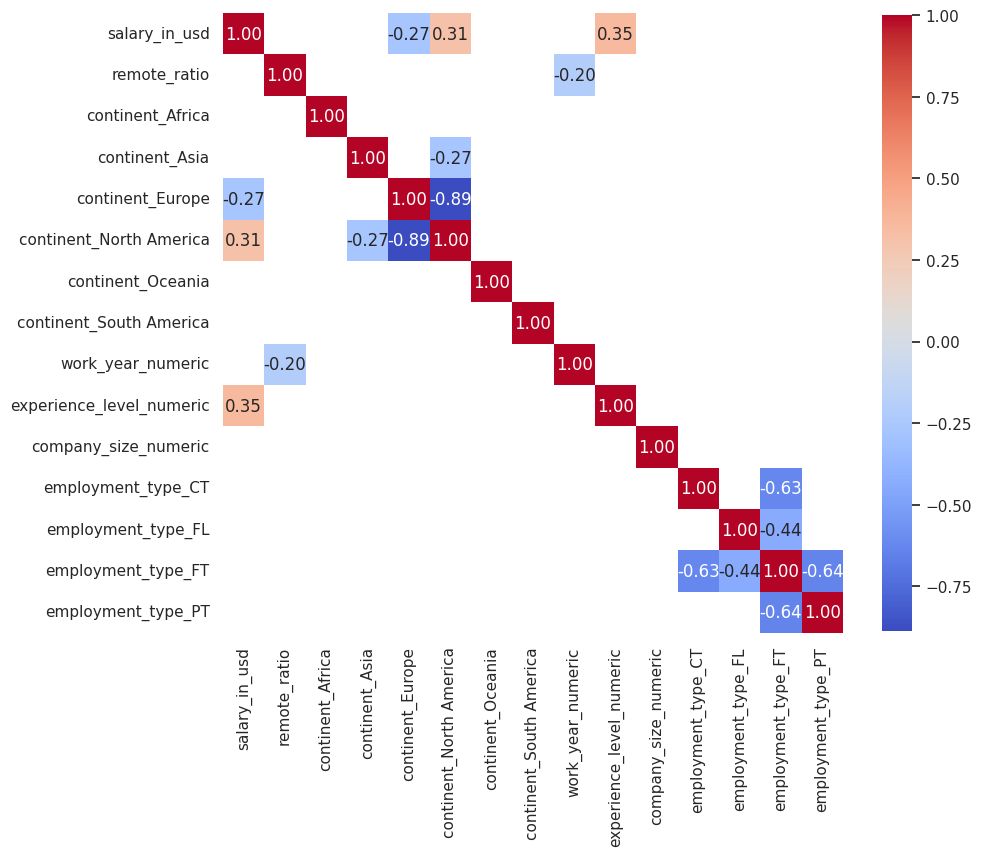

In [ ]:
correlation_matrix = df_encoded.corr()
filtered_corr_matrix = correlation_matrix.where((correlation_matrix > 0.2) | (correlation_matrix < -0.20), other=np.nan)
plt.figure(figsize=(10, 10))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, mask=np.isnan(filtered_corr_matrix), cbar_kws={"shrink": .8})
plt.show()

# C. Análisis de regresión

In [ ]:
#unión de datasets
# Agrega un índice único a cada DataFrame
df = df.reset_index().rename(columns={'index': 'unique_id'})
df_encoded = df_encoded.reset_index().rename(columns={'index': 'unique_id'})

# Selecciona las columnas únicas de df_encoded y haz el merge
unique_columns = df_encoded.columns.difference(['unique_id'])
df_encoded_unique = df_encoded[['unique_id'] + list(unique_columns)]

# Realiza el merge basado en 'unique_id'
merged_df = df.merge(df_encoded_unique, on='unique_id', how='left')
df = merged_df.copy()


## Selección de la Variable Objetivo

In [ ]:
# Definir la variable objetivo
y = df['salary_usd_modified']

La variable que seleccionamos es 'salary_usd_modified' ya que el objetivo de este análisis es predecir los salarios en USD (salary_usd_modified) de los empleados en roles de ciencia de datos. Esta variable es numérica y continua, lo cual es esencial para un modelo de regresión. Además, predecir el salario es relevante para entender factores que influyen en la remuneración y puede ofrecer insights para políticas de compensación.

## Selección de Variables Predictoras:


In [ ]:
# Variables predictoras
X = df[['continent_North America', 'experience_level_numeric']]

Estas variables predictoras son relevantes porque el nivel de experiencia, el año de trabajo y el tamaño de la empresa son factores que suelen influir en el salario de una persona.

## Definición del Objetivo del Modelo de Regresión

Objetivo del Modelo de Regresión: "Estimar el salario en USD de empleados en roles de ciencia de datos en función de su ubicación (continente) y nivel de experiencia."

## Implementación y Comparación de Modelos de Regresión:


In [ ]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# @title
# Diccionario para almacenar los resultados
resultados_modelos = {}

# Regresión Lineal OLS
modelo_ols = LinearRegression()
modelo_ols.fit(X_train, y_train)
predicciones_ols = modelo_ols.predict(X_test)
resultados_modelos['OLS'] = {
    'R2': r2_score(y_test, predicciones_ols),
    'MSE': mean_squared_error(y_test, predicciones_ols)
}

# Lasso
modelo_lasso = Lasso()
modelo_lasso.fit(X_train, y_train)
predicciones_lasso = modelo_lasso.predict(X_test)
resultados_modelos['Lasso'] = {
    'R2': r2_score(y_test, predicciones_lasso),
    'MSE': mean_squared_error(y_test, predicciones_lasso)
}

# Ridge
modelo_ridge = Ridge()
modelo_ridge.fit(X_train, y_train)
predicciones_ridge = modelo_ridge.predict(X_test)
resultados_modelos['Ridge'] = {
    'R2': r2_score(y_test, predicciones_ridge),
    'MSE': mean_squared_error(y_test, predicciones_ridge)
}

# Regresión Polinómica (Grado 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, y_train)
predicciones_poly = modelo_poly.predict(X_test_poly)
resultados_modelos['Polynomial OLS'] = {
    'R2': r2_score(y_test, predicciones_poly),
    'MSE': mean_squared_error(y_test, predicciones_poly)
}

# Árbol de Decisión
modelo_decision_tree = DecisionTreeRegressor(random_state=42)
modelo_decision_tree.fit(X_train, y_train)
predicciones_decision_tree = modelo_decision_tree.predict(X_test)
resultados_modelos['Decision Tree'] = {
    'R2': r2_score(y_test, predicciones_decision_tree),
    'MSE': mean_squared_error(y_test, predicciones_decision_tree)
}

# Random Forest
modelo_random_forest = RandomForestRegressor(random_state=42)
modelo_random_forest.fit(X_train, y_train)
predicciones_random_forest = modelo_random_forest.predict(X_test)
resultados_modelos['Random Forest'] = {
    'R2': r2_score(y_test, predicciones_random_forest),
    'MSE': mean_squared_error(y_test, predicciones_random_forest)
}

# Support Vector Regression
modelo_svr = SVR()
modelo_svr.fit(X_train, y_train)
predicciones_svr = modelo_svr.predict(X_test)
resultados_modelos['SVR'] = {
    'R2': r2_score(y_test, predicciones_svr),
    'MSE': mean_squared_error(y_test, predicciones_svr)
}

##  Evaluación de Modelos:
Calculen y comparen R² y MSE para cada modelo,
discutiendo cuál de ellos resulta el mejor para este problema.

In [ ]:
# Mostrar resultados
for modelo, metricas in resultados_modelos.items():
    print(f"{modelo} -> R²: {metricas['R2']:.4f}, MSE: {metricas['MSE']:.4f}")


OLS -> R²: 0.2421, MSE: 2578720546.5468
Lasso -> R²: 0.2421, MSE: 2578726396.6094
Ridge -> R²: 0.2421, MSE: 2578752079.3856
Polynomial OLS -> R²: 0.2428, MSE: 2576109710.9568
Decision Tree -> R²: 0.2439, MSE: 2572579197.5341
Random Forest -> R²: 0.2438, MSE: 2572722461.4905
SVR -> R²: 0.0008, MSE: 3399682878.9846


- OLS, Lasso y Ridge: Todos alcanzan un
𝑅
2
R
2
  de 0.242 con MSE cercano a 257 millones, ofreciendo un ajuste básico pero limitado para este problema.

- Polynomial OLS: Apenas mejora el rendimiento respecto al OLS regular (
𝑅
2
R
2
  de 0.2428), sin cambios significativos en el ajuste.

- Decision Tree: Con un
𝑅
2
R
2
  de 0.2439, supera ligeramente a los modelos lineales, pero su precisión sigue siendo baja.

- Random Forest: Logra el mejor
𝑅
2
R
2
  (0.2438), indicando el mejor ajuste dentro de los modelos evaluados, aunque su MSE sigue siendo alto.

- SVR: Presenta un
𝑅
2
R
2
  de 0.0008 y un MSE muy alto, siendo el modelo menos adecuado para este problema.

  Conclusión final: Para este problema, Random Forest es el mejor modelo entre los evaluados, ya que ofrece el mayor
𝑅
2
R
2
  (0.2438), lo que sugiere que es el más adecuado para captar la relación entre las variables predictoras y el salario.

# D. Análisis de Clasificación




## Código

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df['is_senior'] = df['experience_level'].apply(lambda x: 1 if x == 'SE' else 0)

In [ ]:
y = df['is_senior']  # Variable objetivo

In [ ]:
# Selección de las variables predictoras y la variable objetivo
X = df[['salary_usd_modified', 'remote_ratio_x']]

In [ ]:
# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista para almacenar resultados de cada modelo
model_results = {}


In [ ]:
# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()

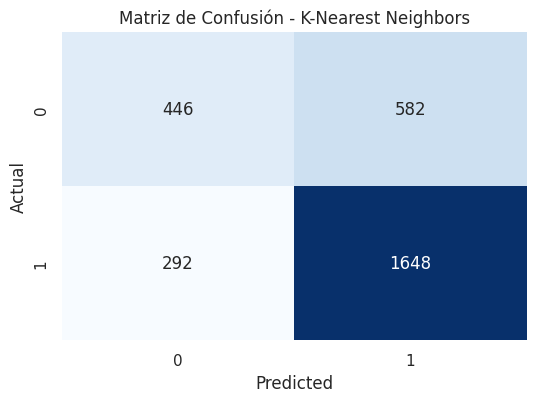

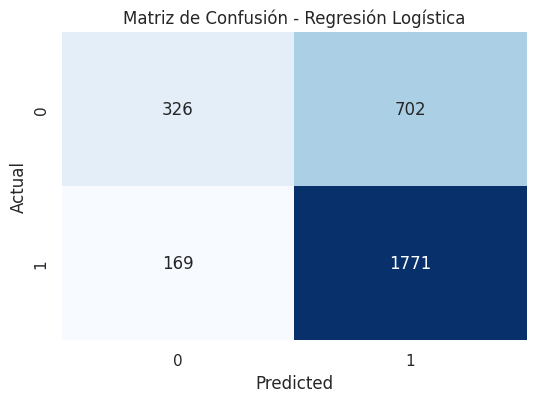

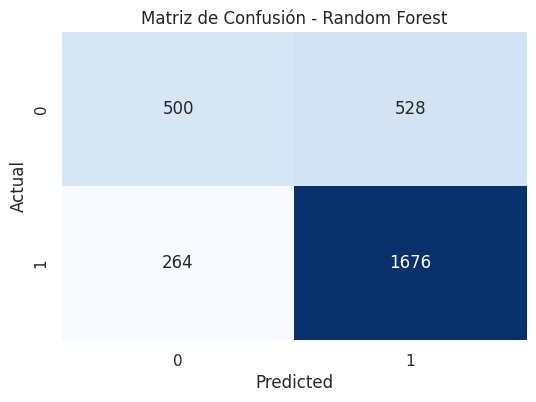


Resultados para KNN:
              precision    recall  f1-score   support

           0       0.60      0.43      0.51      1028
           1       0.74      0.85      0.79      1940

    accuracy                           0.71      2968
   macro avg       0.67      0.64      0.65      2968
weighted avg       0.69      0.71      0.69      2968


Resultados para Logistic Regression:
              precision    recall  f1-score   support

           0       0.66      0.32      0.43      1028
           1       0.72      0.91      0.80      1940

    accuracy                           0.71      2968
   macro avg       0.69      0.62      0.62      2968
weighted avg       0.70      0.71      0.67      2968


Resultados para Random Forest:
              precision    recall  f1-score   support

           0       0.65      0.49      0.56      1028
           1       0.76      0.86      0.81      1940

    accuracy                           0.73      2968
   macro avg       0.71      0.68   

In [ ]:

# Modelo 1: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
model_results['KNN'] = classification_report(y_test, y_pred_knn)
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")

# Modelo 2: Regresión Logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
model_results['Logistic Regression'] = classification_report(y_test, y_pred_logreg)
plot_confusion_matrix(y_test, y_pred_logreg, "Regresión Logística")

# Modelo 3: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
model_results['Random Forest'] = classification_report(y_test, y_pred_rf)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Mostramos los resultados de cada modelo
for model_name, report in model_results.items():
    print(f"\nResultados para {model_name}:\n{report}")


Random Forest es el modelo más adecuado en este caso, ya que logra el mejor equilibrio entre precisión y recall para ambas clases. Es especialmente eficaz en un dataset desequilibrado, dado que clasifica bien a la mayoría de los empleados senior y mejora el rendimiento en la clasificación de los empleados no senior.
A continuación, aplicaremos una tecnica que ayuda a disminuir los desequilibrios entre nuestras variables. En este caso, utilizamos SMOTE que crea datos de las minoritarias para equilibrar el dataset

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleccionamos las variables predictoras y la variable objetivo
X = df[['salary_usd_modified', 'remote_ratio_x']]  # Ajusta si tienes más variables predictoras
y = df['is_senior']

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos SMOTE solo en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalizamos los datos después de aplicar SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print("Distribución de clases en el conjunto de entrenamiento después de SMOTE:")
print(y_train_resampled.value_counts())


Distribución de clases en el conjunto de entrenamiento después de SMOTE:
is_senior
0    7756
1    7756
Name: count, dtype: int64


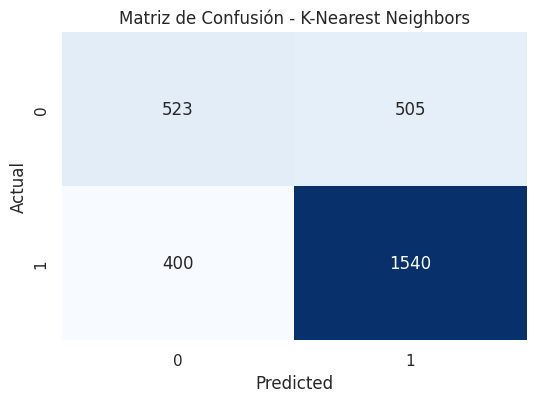

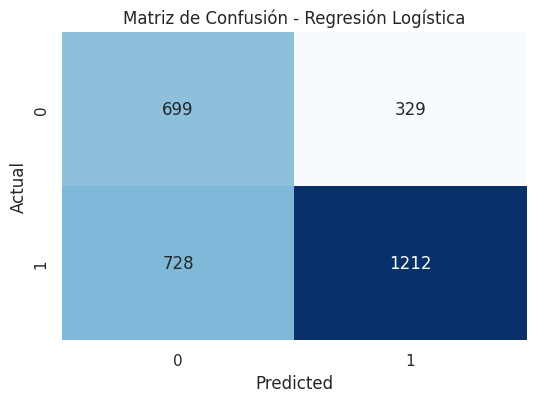

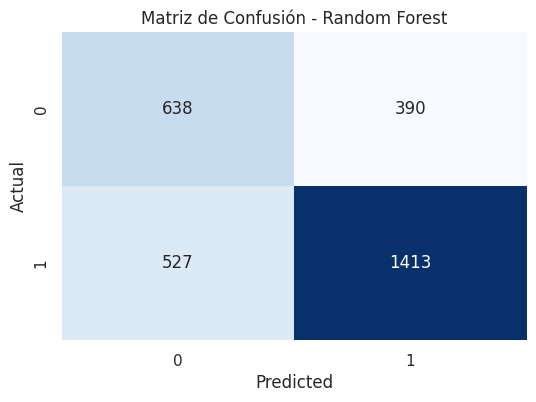


Resultados para KNN:
              precision    recall  f1-score   support

           0       0.57      0.51      0.54      1028
           1       0.75      0.79      0.77      1940

    accuracy                           0.70      2968
   macro avg       0.66      0.65      0.65      2968
weighted avg       0.69      0.70      0.69      2968


Resultados para Logistic Regression:
              precision    recall  f1-score   support

           0       0.49      0.68      0.57      1028
           1       0.79      0.62      0.70      1940

    accuracy                           0.64      2968
   macro avg       0.64      0.65      0.63      2968
weighted avg       0.68      0.64      0.65      2968


Resultados para Random Forest:
              precision    recall  f1-score   support

           0       0.55      0.62      0.58      1028
           1       0.78      0.73      0.76      1940

    accuracy                           0.69      2968
   macro avg       0.67      0.67   

In [ ]:
# Seleccionamos las variables predictoras y la variable objetivo
X = df[['salary_usd_modified', 'remote_ratio_x']]  # Ajusta si tienes más variables predictoras
y = df['is_senior']

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos SMOTE solo en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalizamos los datos después de aplicar SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Lista para almacenar resultados de cada modelo
model_results = {}

# Modelo 1: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_resampled)
y_pred_knn = knn.predict(X_test_scaled)
model_results['KNN'] = classification_report(y_test, y_pred_knn)
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")

# Modelo 2: Regresión Logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test_scaled)
model_results['Logistic Regression'] = classification_report(y_test, y_pred_logreg)
plot_confusion_matrix(y_test, y_pred_logreg, "Regresión Logística")

# Modelo 3: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)
model_results['Random Forest'] = classification_report(y_test, y_pred_rf)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Mostramos los resultados de cada modelo
for model_name, report in model_results.items():
    print(f"\nResultados para {model_name}:\n{report}")


## Conclusiones


Se implementaron tres algoritmos de clasificación (K-Nearest Neighbors, Regresión Logística y Random Forest) para predecir si un empleado es senior o no, utilizando un conjunto de datos desbalanceado. A continuación, se resumen los hallazgos


*   K-Nearest Neighbors (KNN):

      Desempeño: KNN mostró un buen desempeño al clasificar correctamente a los empleados senior (clase 1), con una alta precisión y recall para esta clase. Sin embargo, el modelo presentó dificultades en la clasificación de empleados no senior (clase 0), con un recall moderado y un F1-score bajo para la clase minoritaria.
*   Regresión Logística:
Desempeño: La regresión logística presentó un rendimiento equilibrado para ambas clases, pero con una precisión general más baja (64%) en comparación con KNN y Random Forest. Aunque el recall para la clase no senior fue relativamente alto (0.68), el recall para la clase senior fue bajo (0.62), indicando que el modelo tuvo dificultades para identificar correctamente a los empleados senior.
* Random Forest:

Desempeño: Random Forest ofreció un rendimiento equilibrado, con una precisión moderada de 69%, y un buen recall para ambas clases (0.73 para la clase senior y 0.62 para la clase no senior). El modelo logró manejar mejor el desbalance de clases en comparación con los otros modelos.

Como conclusión tenemos que el mejor rendimiento lo tiene KNN con la mayor precisión y recall en general, especialmente para la clase 1 (empleados seniors). Sin embargo, no es perfecto, ya que sigue siendo menos eficaz en la clasificación de empleados no seniors.

# Descargar Dataset Para realizar Dashboard (*Ignore Esto profesor*)

In [ ]:
df.to_excel('df_dashboard.xlsx', index=False)

In [ ]:
df.to_csv('df_csv.csv', index=False)

#Clustering y Segmentación

## Codigo y visualización



In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Seleccionar variables relevantes para clustering
selected_columns = ['salary_in_usd_y', 'remote_ratio_y']
clustering_data = df[selected_columns]

# Escalar las variables
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Convertir a DataFrame escalado para facilitar la interpretación
clustering_data_scaled_df = pd.DataFrame(clustering_data_scaled, columns=selected_columns)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(clustering_data_scaled)

# Evaluar la calidad de los clusters de K-Means
silhouette_kmeans = silhouette_score(clustering_data_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(clustering_data_scaled, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(clustering_data_scaled, kmeans_labels)

print("K-Means Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans}")
print(f"Davies-Bouldin Score: {davies_bouldin_kmeans}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_kmeans}")

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(clustering_data_scaled)

# Evaluar la calidad de los clusters de DBSCAN (evitar métricas si hay ruido -1)
if len(set(dbscan_labels)) > 1:  # Evitar evaluación si todos los puntos son ruido
    silhouette_dbscan = silhouette_score(clustering_data_scaled, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(clustering_data_scaled, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(clustering_data_scaled, dbscan_labels)

    print("\nDBSCAN Clustering Evaluation:")
    print(f"Silhouette Score: {silhouette_dbscan}")
    print(f"Davies-Bouldin Score: {davies_bouldin_dbscan}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_dbscan}")
else:
    print("\nDBSCAN Clustering Evaluation: No se pueden evaluar métricas debido a ruido excesivo o clusters insuficientes.")


K-Means Clustering Evaluation:
Silhouette Score: 0.568589013464677
Davies-Bouldin Score: 0.6053233690061149
Calinski-Harabasz Score: 18334.191852667627

DBSCAN Clustering Evaluation:
Silhouette Score: 0.39429029390487447
Davies-Bouldin Score: 0.7985721736107553
Calinski-Harabasz Score: 4883.80014406392


K-Means Clustering Evaluation:
Silhouette Score: 0.455150524106261
Davies-Bouldin Score: 0.8203940649237015
Calinski-Harabasz Score: 191.11118932684283

DBSCAN Clustering Evaluation:
Silhouette Score: 0.36952928929955847
Davies-Bouldin Score: 1.4339770213186025
Calinski-Harabasz Score: 100.15919799670233


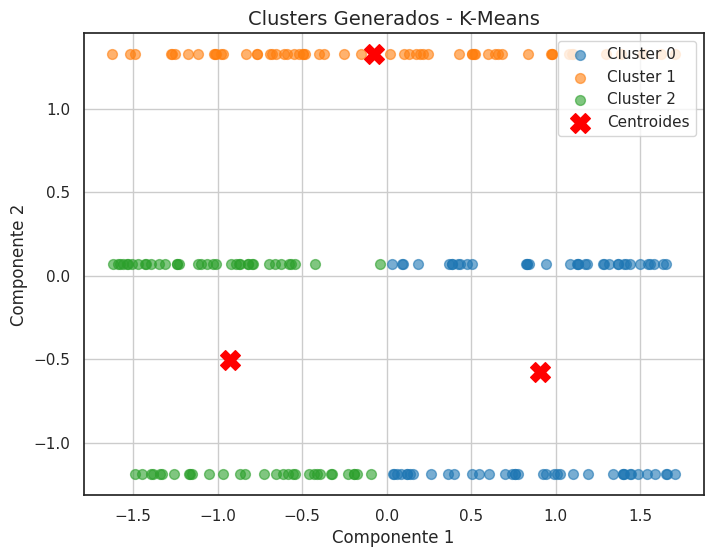

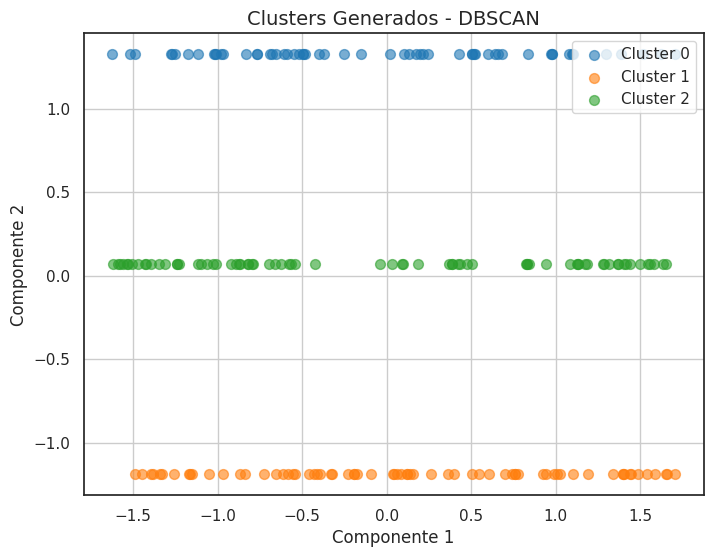

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

np.random.seed(42)
df = pd.DataFrame({
    'salary_in_usd_y': np.random.rand(200) * 100000,
    'remote_ratio_y': np.random.choice([0, 50, 100], size=200)
})

# Seleccionar variables relevantes para clustering
selected_columns = ['salary_in_usd_y', 'remote_ratio_y']
clustering_data = df[selected_columns]

# Escalar las variables
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Convertir a DataFrame escalado para facilitar la interpretación
clustering_data_scaled_df = pd.DataFrame(clustering_data_scaled, columns=selected_columns)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(clustering_data_scaled)

# Evaluar la calidad de los clusters de K-Means
silhouette_kmeans = silhouette_score(clustering_data_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(clustering_data_scaled, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(clustering_data_scaled, kmeans_labels)

print("K-Means Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans}")
print(f"Davies-Bouldin Score: {davies_bouldin_kmeans}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_kmeans}")

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(clustering_data_scaled)

# Evaluar la calidad de los clusters de DBSCAN (evitar métricas si hay ruido -1)
if len(set(dbscan_labels)) > 1:  # Evitar evaluación si todos los puntos son ruido
    silhouette_dbscan = silhouette_score(clustering_data_scaled, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(clustering_data_scaled, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(clustering_data_scaled, dbscan_labels)

    print("\nDBSCAN Clustering Evaluation:")
    print(f"Silhouette Score: {silhouette_dbscan}")
    print(f"Davies-Bouldin Score: {davies_bouldin_dbscan}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_dbscan}")
else:
    print("\nDBSCAN Clustering Evaluation: No se pueden evaluar métricas debido a ruido excesivo o clusters insuficientes.")

# Función para graficar clusters
def plot_clusters(data, labels, title, algorithm_name, centroids=None):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    palette = sns.color_palette("tab10", len(unique_labels))

    for label, color in zip(unique_labels, palette):
        cluster_points = data[labels == label]
        plt.scatter(
            cluster_points[:, 0],
            cluster_points[:, 1],
            s=50,
            label=f"Cluster {label}" if label != -1 else "Ruido",
            alpha=0.6,
            color=color
        )

    # Si hay centroides, graficarlos
    if centroids is not None:
        plt.scatter(
            centroids[:, 0],
            centroids[:, 1],
            s=200,
            c='red',
            marker='X',
            label="Centroides"
        )

    plt.title(f"{title} - {algorithm_name}", fontsize=14)
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar los clusters de K-Means
plot_clusters(
    clustering_data_scaled,
    kmeans_labels,
    "Clusters Generados",
    "K-Means",
    centroids=kmeans.cluster_centers_
)

# Graficar los clusters de DBSCAN
plot_clusters(
    clustering_data_scaled,
    dbscan_labels,
    "Clusters Generados",
    "DBSCAN"
)

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Seleccionar variables relevantes para clustering (modificar según tu dataset)
selected_columns = ['salary_in_usd_y', 'remote_ratio_y']
clustering_data = df[selected_columns]

# Escalar las variables
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Convertir a DataFrame escalado para facilitar la interpretación
clustering_data_scaled_df = pd.DataFrame(clustering_data_scaled, columns=selected_columns)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(clustering_data_scaled)

# Evaluar la calidad de los clusters de K-Means
silhouette_kmeans = silhouette_score(clustering_data_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(clustering_data_scaled, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(clustering_data_scaled, kmeans_labels)

# Mostrar los resultados de K-Means
print("Resultados de Evaluación para K-Means:")
print(f"Índice de Silueta: {silhouette_kmeans:.3f} (más cercano a 1, mejor calidad)")
print(f"Índice Davies-Bouldin: {davies_bouldin_kmeans:.3f} (más cercano a 0, mejor calidad)")
print(f"Índice Calinski-Harabasz: {calinski_harabasz_kmeans:.3f} (valores altos indican mejor calidad)")

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(clustering_data_scaled)

# Evaluar la calidad de los clusters de DBSCAN (evitar métricas si hay ruido -1)
if len(set(dbscan_labels)) > 1:  # Evitar evaluación si todos los puntos son ruido
    silhouette_dbscan = silhouette_score(clustering_data_scaled, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(clustering_data_scaled, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(clustering_data_scaled, dbscan_labels)

    # Mostrar los resultados de DBSCAN
    print("\nResultados de Evaluación para DBSCAN:")
    print(f"Índice de Silueta: {silhouette_dbscan:.3f} (más cercano a 1, mejor calidad)")
    print(f"Índice Davies-Bouldin: {davies_bouldin_dbscan:.3f} (más cercano a 0, mejor calidad)")
    print(f"Índice Calinski-Harabasz: {calinski_harabasz_dbscan:.3f} (valores altos indican mejor calidad)")
else:
    print("\nResultados de Evaluación para DBSCAN:")
    print("No se pueden evaluar métricas debido a ruido excesivo o clusters insuficientes.")

# Interpretación basada en los resultados
print("\nInterpretación:")
if silhouette_kmeans > 0.5:
    print("- Los clusters generados por K-Means tienen buena separación y compacidad.")
else:
    print("- Los clusters generados por K-Means podrían solaparse, ajuste n_clusters.")

if len(set(dbscan_labels)) > 1 and silhouette_dbscan > 0.5:
    print("- Los clusters generados por DBSCAN son significativos, con separación adecuada.")
else:
    print("- DBSCAN podría necesitar ajustes en eps o min_samples para mejorar la calidad de los clusters.")


Resultados de Evaluación para K-Means:
Índice de Silueta: 0.569 (más cercano a 1, mejor calidad)
Índice Davies-Bouldin: 0.605 (más cercano a 0, mejor calidad)
Índice Calinski-Harabasz: 18334.192 (valores altos indican mejor calidad)

Resultados de Evaluación para DBSCAN:
Índice de Silueta: 0.394 (más cercano a 1, mejor calidad)
Índice Davies-Bouldin: 0.799 (más cercano a 0, mejor calidad)
Índice Calinski-Harabasz: 4883.800 (valores altos indican mejor calidad)

Interpretación:
- Los clusters generados por K-Means tienen buena separación y compacidad.
- DBSCAN podría necesitar ajustes en eps o min_samples para mejorar la calidad de los clusters.
